In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import sys
import random
import math
import re
import time
import numpy as np
N='10'
a=Image.open('/Users/sofiadunlosky/Downloads/ilovepdf_images-extracted/img'+N+'.jpg')

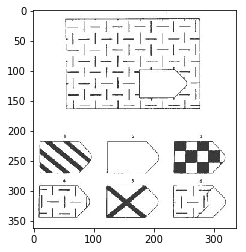

In [8]:
plt.imshow(np.array(a))

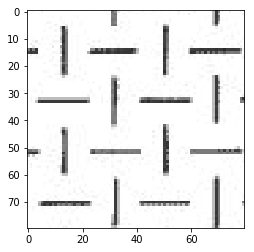

In [20]:
plt.imshow(np.array(a)[20:150,60:170,:])
np.array(a)[20:150,60:170,:].shape
plt.imshow(np.array(a)[100:150,110:170,:])
plt.imshow(np.array(a)[70:150,90:170,:])

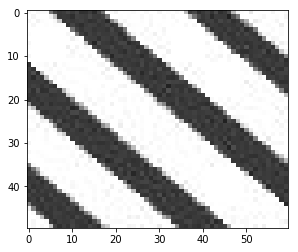

In [30]:
plt.imshow(np.array(a)[220:270,15:75,:])

(50, 60, 3)

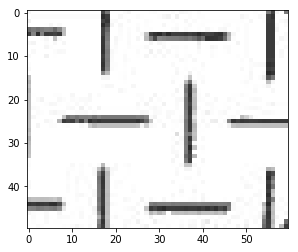

In [4]:
plt.imshow(np.array(a)[293:343,15:75,:])
np.array(a)[293:343,15:75,:].shape

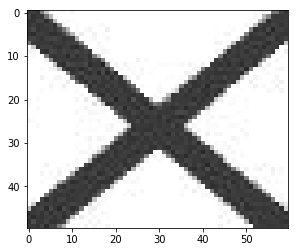

In [42]:
plt.imshow(np.array(a)[293:343,125:185,:])

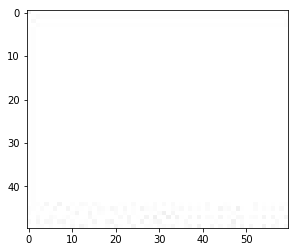

In [6]:
plt.imshow(np.array(a)[220:270,125:185,:])

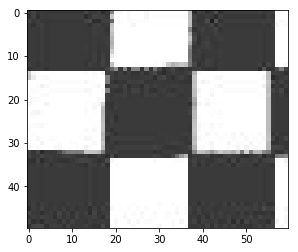

In [45]:
plt.imshow(np.array(a)[220:270,235:295,:])

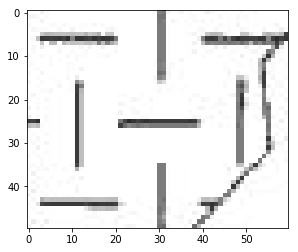

In [46]:
plt.imshow(np.array(a)[293:343,235:295,:])

In [7]:
pic=np.zeros((50,60,6))
pic[:,:,0]=np.array(a)[220:270,15:75,0]
pic[:,:,3]=np.array(a)[293:343,15:75,0]
pic[:,:,1]=np.array(a)[220:270,125:185,0]
pic[:,:,4]=np.array(a)[293:343,125:185,0]
pic[:,:,2]=np.array(a)[220:270,235:295,0]
pic[:,:,5]=np.array(a)[293:343,235:295,0]
p=np.array(a)[100:150,110:170,0]

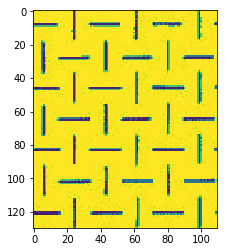

In [2]:
plt.imshow(np.array(a)[20:150,60:170,0])

In [1]:
from con import train_cov
import matplotlib.pyplot as plt
from PIL import Image
import os
import sys
import random
import math
import re
import time
import numpy as np
N='10'
a=Image.open('/Users/sofiadunlosky/Downloads/ilovepdf_images-extracted/img'+N+'.jpg')
w1,w2=train_cov(np.array(a)[70:150,90:170,0])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 1, Minibatch Loss= 29751.4062, Train Accuracy= 0.375
Step 10, Minibatch Loss= 3271.6982, Train Accuracy= 0.875
Step 20, Minibatch Loss= 25513.7578, Train Accuracy= 0.625
Step 30, Minibatch Loss= 13875.2432, Train Accuracy= 0.250
Step 40, Minibatch Loss= 2779.5359, Train Accuracy= 0.750
Step 50, Minibatch Loss= 17815.0879, Train Accuracy= 0.625
Step 60, Minibatch Loss= 0.0000, Train Accuracy= 1.000


In [13]:
n

array([[1, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [33]:
import tensorflow as tf
from convo import conv2d, maxpool2d
with tf.Session() as sess:
    p1=tf.reshape(p.astype('float64').reshape(1,3000)/255 , shape=[-1, 50,60 , 1])
    I=conv2d(p1, w1)
    I=maxpool2d(I,k=5)
    I1 = conv2d(I, w2)
    I1=maxpool2d(I1,k=5)
    I1=tf.reshape(I1,[-1,36]).eval()
I1

array([[149.2107212 ,   0.        , 103.08738435,   0.        ,
         19.5705833 , 115.18902515, 154.34245988,  58.52917602,
         58.53081114,   0.        ,  34.61131265, 144.32115634,
         93.74940811,  68.88470532,  96.4860726 ,   4.47587689,
         27.31358683, 150.46302358,  93.02667145,  35.23229077,
          0.        ,   0.        ,   0.        ,  65.60259518,
         85.86443535,  88.96627006,  28.04263419,   0.        ,
          1.04523941, 140.51928492, 144.54025312,  90.85281137,
         33.84040555,   0.        ,  29.84594165, 141.85625003]])

In [36]:
II2=np.zeros((6,36))
with tf.Session() as sess:
    for i in range (0,6):
        p1=tf.reshape(pic[:,:,i].astype('float64').reshape(1,3000)/255 , shape=[-1, 50,60 , 1])
        II=conv2d(p1, w1)
        II=maxpool2d(II,k=5)
        II1 = conv2d(II, w2)
        II1=maxpool2d(II1,k=5)
        II1=tf.reshape(II1,[-1,36]).eval()
        II2[i,:]=II1


In [40]:
E=np.zeros(6)
for i in range (0,6):
    E[i]=np.abs(II2[i,:]-I1).sum()

In [45]:
E1=np.zeros(6)
for i in range (0,6):
    E1[i]=(II2[i,:]-I1).sum()
E1

array([ 172.17509979, -581.58854311,  243.82815162,  -81.00024245,
        366.4472181 , -240.77888283])

In [41]:
E

array([897.58084168, 680.46314873, 840.09572489, 468.24533102,
       706.69789526, 466.03329095])

In [5]:
# np.save('w1.npy',w1)
# np.save('w2.npy',w2)
import numpy as np
w1=np.load('w1.npy')
w2=np.load('w2.npy')
from prepare import prep
M=prep(pic,w1.reshape(25,25,1,3,1),w2.reshape(50,50,3,6,1))
M.shape


(1, 6, 7020)

In [16]:
C=M[0,0,:]==M[0,1,:]
C[C==0]

array([], dtype=bool)

In [6]:
data0=M.reshape(6,7020)
answer=np.zeros((6,2))
for i in range (0,6):
    answer[i,:]=[0,1]
    if i==3:
        answer[i,:]=[1,0]

In [ ]:
plt.imshow(np.array(a)[220:270,125:185,:])

In [ ]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y = data0,answer
        # Run optimization op (backprop)

        loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                             Y: batch_y,
                                                             keep_prob: 1.0})
        print("Step " + str(step) + ", Minibatch Loss= " + \
                "{:.4f}".format(loss) + ", Train Accuracy= " + \
                "{:.3f}".format(acc))

    print("Finished!")
